In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1009).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1018).jpg
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1043).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1046).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1052).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1056).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1077).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1081).jpg
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (1084).JPG
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\test\Blight\Corn_Blight (110).png
E:\MITAOE\BTech\DeepLearning\Encoder Decoder\splitted_data\te

## importing libraries

To begin with, we need to import several libraries to enable us to perform various tasks related to data visualization, image processing, and machine learning.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from PIL import Image
from sklearn.model_selection import train_test_split

##  Loading the Dataset:

In [3]:
root="E:/MITAOE/BTech/DeepLearning/Encoder Decoder/splitted_data/train"
categories=os.listdir(root)
categories

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

## Creating Image and Label Lists

In [4]:
images = []
labels = []
for category in categories:
    directory = root +"/" + category + '/'
    for image_file in os.listdir(directory):
        images.append(directory + image_file)
        labels.append(category)

## Creating a DataFrame



In [5]:
images = pd.Series(images, name="Image")
labels = pd.Series(labels, name="Quality")
data=pd.concat([images,labels], axis=1)
data.head()

Image Quality
0  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Blight
1  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Blight
2  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Blight
3  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Blight
4  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Blight

## Shuffling the DataFrame**

In [6]:
data=data.sample(frac=1).reset_index(drop = True)
data.head()

Image      Quality
0  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...      Healthy
1  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...      Healthy
2  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Common_Rust
3  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...      Healthy
4  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...      Healthy

## Displaying Random Images

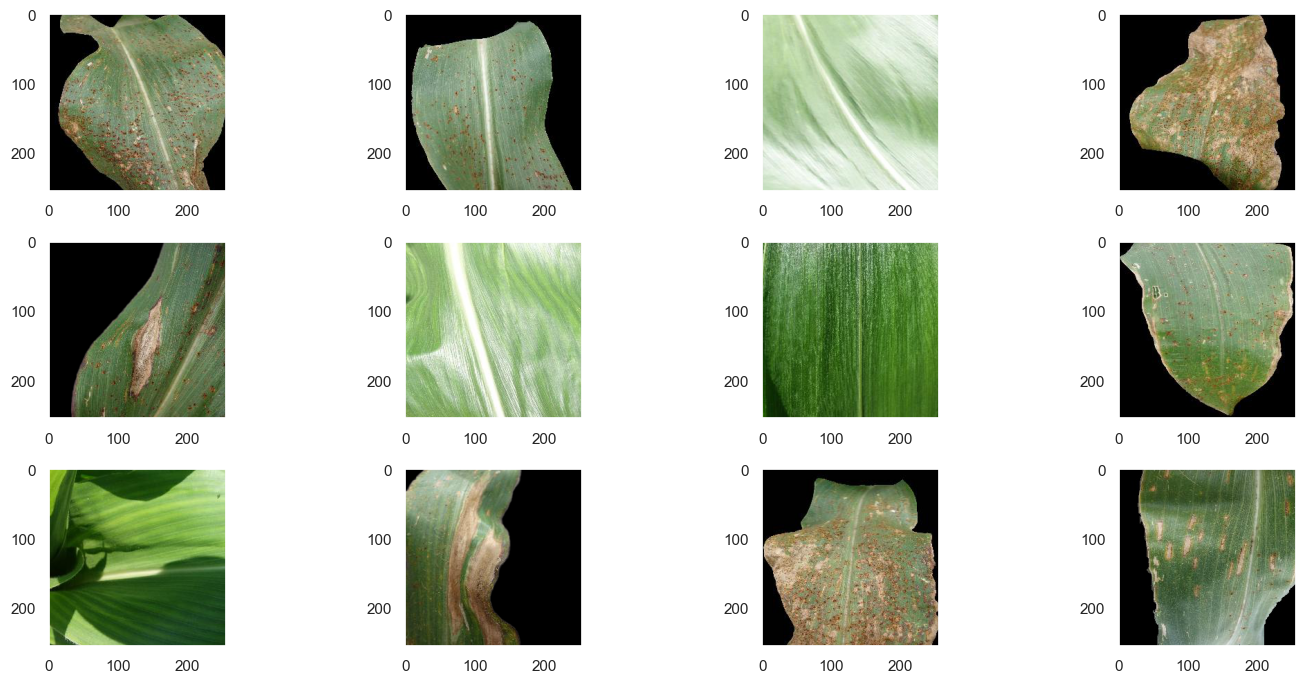

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(15, 7))

for ax in axes.flat:
    i = np.random.randint(0, data.shape[0])
    ax.imshow(Image.open(data.loc[i, "Image"]))
    ax.grid(False)  
    
plt.tight_layout()
plt.show()

##  Train-Test Split:

In [8]:
dev, held_out =train_test_split(
    data, 
    train_size=0.9, 
    shuffle=True,
    random_state=42)
# Printing Shape Information:

print(dev.shape)
print(held_out.shape)

(2637, 2)
(293, 2)


## Data Preprocessing and Image Data Generators

In [9]:
import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Rescaling,Data Augmentation and rescaling

In [10]:
# Rescaling and Data Augmentation
dev_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)


# In this case, the generator performs rescaling (normalization) on the image.
# Each pixel value is divided by 255 to obtain values in the range [0, 1].
held_generator = ImageDataGenerator(rescale=1./255)

##  Flow from DataFrame:

In [11]:
train_images = dev_generator.flow_from_dataframe(
    dataframe=dev,  # Make sure to provide the correct DataFrame
    x_col='Image',  # Update to the correct column name for images
    y_col='Quality',  # Update to the correct column name for labels
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 2110 validated image filenames belonging to 4 classes.


In [12]:
val_images = dev_generator.flow_from_dataframe(
    dataframe=dev,
    x_col='Image',
    y_col='Quality',
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 527 validated image filenames belonging to 4 classes.



## Flow from DataFrame for Testing

In [13]:
held_images = held_generator.flow_from_dataframe(
    dataframe=held_out,
    x_col='Image',
    y_col='Quality',
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 293 validated image filenames belonging to 4 classes.


In [14]:
labels = train_images.class_indices
labels

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

## VGG16 Fine-tuning
`This code demonstrates how to perform fine-tuning using the VGG16 model. The VGG16 model is a deep convolutional neural network that has been pre-trained on the ImageNet dataset. Fine-tuning involves taking the pre-trained model and adapting it to a new task or dataset by training the top layers while keeping the lower layers frozen.`

In [15]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import RMSprop

Load the pre-trained VGG16 model:

The VGG16 class from keras.applications is used to load the pre-trained VGG16 model without the top layer.

The weights parameter is set to 'imagenet' to load the weights trained on ImageNet.

The include_top parameter is set to False to exclude the fully connected layers at the top of the network.

The input_shape parameter is set to (150, 150, 3) to match the expected input size.

In [16]:
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

## Freeze the layers in the base model:

The layers in the base model are iterated through, and their trainable attribute is set to False. 
This freezes the weights of the layers so that they are not updated during training.

## Add custom top layers:

A series of fully connected and dropout layers are added on top of the base model to learn task-specific features.
The Flatten layer is used to flatten the output of the base model.
Two Dense layers with 4096 units and ReLU activation are added, along with Dropout layers with a dropout rate of 0.5 to prevent overfitting.
The final Dense layer with 3 units and softmax activation is added to generate the predictions for the three classes.

## Create the fine-tuned model:

The Model class from keras.models is used to create the fine-tuned model, specifying the inputs and outputs.
The input is set to the input of the base model, and the output is set to the predictions generated by the custom top layers.

In [17]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

## Compile the model:
The model is compiled using the RMSprop optimizer with a learning rate of 0.0001.
The loss function is set to 'categorical_crossentropy', and the accuracy metric is used for evaluation.

In [18]:
# Define optimizer
optimizer = RMSprop(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,38

 Total params: 65,070,916 (248.23 MB)

 Trainable params: 50,356,228 (192.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Train the model:
The model is trained using the fit method.
The training data (train_images) and validation data (val_images) are provided. 

In [20]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
tf.__version__

'2.18.0'

In [21]:
# Train the model
history = model.fit(train_images, validation_data=val_images,epochs=25)

c:\USERS\SACHI\MINICONDA3\ENVS\TORCH\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.4960 - loss: 1.7753 - val_accuracy: 0.7647 - val_loss: 0.5367
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.7085 - loss: 0.7507 - val_accuracy: 0.7970 - val_loss: 0.4834
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.7515 - loss: 0.6095 - val_accuracy: 0.7875 - val_loss: 0.5342
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.7830 - loss: 0.5613 - val_accuracy: 0.7400 - val_loss: 0.6304
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.7757 - loss: 0.5580 - val_accuracy: 0.7989 - val_loss: 0.5361
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.7793 - loss: 0.5647 - val_accuracy: 0.8216 - val_loss: 0.4302
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.8015 - loss: 0.4929 - val_accuracy: 0.8368 - val_loss: 0.4003
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.8034 - loss: 0.4960 - val_accuracy: 0.8444 - v

## plotting the graph  

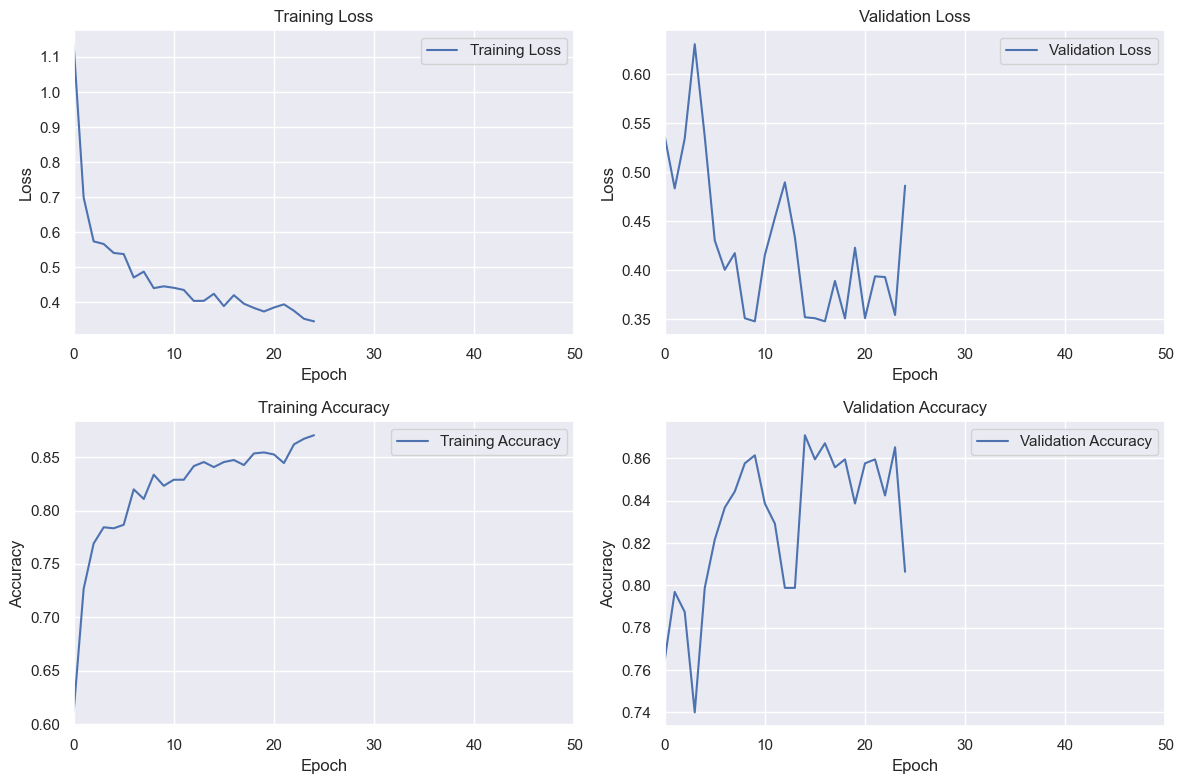

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot training loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xlim([0, 50])  # Set x-axis limits

# Plot validation loss
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xlim([0, 50])  # Set x-axis limits

# Plot training accuracy
axes[1, 0].plot(history.history['accuracy'], label='Training Accuracy')
axes[1, 0].set_title('Training Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xlim([0, 50])  # Set x-axis limits

# Plot validation accuracy
axes[1, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xlim([0, 50])  # Set x-axis limits

plt.tight_layout()
plt.show()

## model prediction and evaluation 

In [23]:
prediction=model.predict(held_images)

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


In [24]:
prediction=np.argmax(prediction, axis=1)
prediction.shape

(293,)

In [25]:
labels = train_images.class_indices
labels = {v: k for k, v in labels.items()}

In [26]:
y_prediction = [labels.get(k) for k in prediction]
y_test = held_out["Quality"].values

##  accuracy evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_prediction))

                precision    recall  f1-score   support

        Blight       0.87      0.45      0.60        75
   Common_Rust       0.77      0.95      0.85        97
Gray_Leaf_Spot       0.60      0.84      0.70        37
       Healthy       1.00      0.99      0.99        84

      accuracy                           0.82       293
     macro avg       0.81      0.81      0.78       293
  weighted avg       0.84      0.82      0.81       293



In [28]:
accuracy_score(y_prediction, y_test)

0.8191126279863481

## confusion matrix 

In [29]:

from sklearn.metrics import confusion_matrix

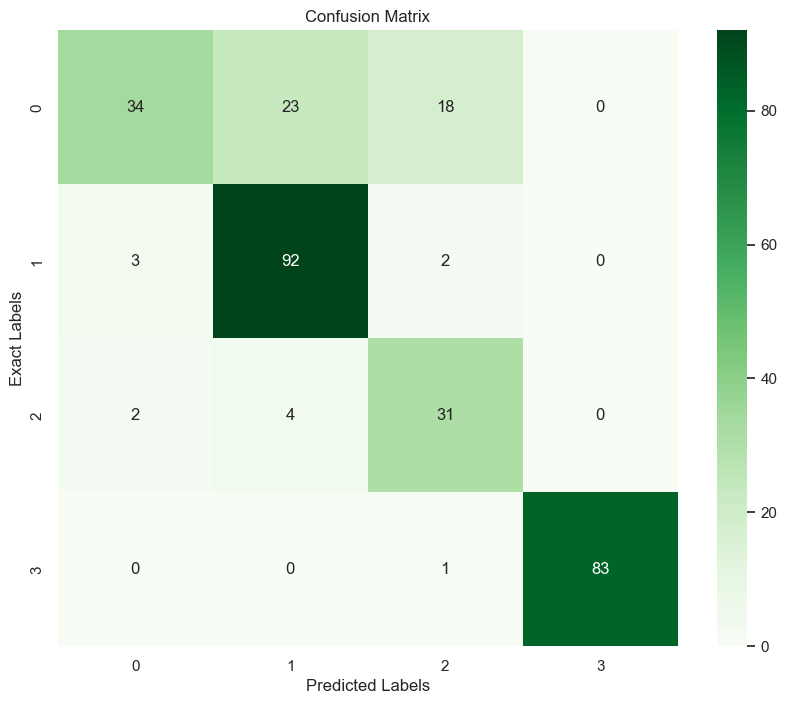

In [30]:
cm = confusion_matrix(y_test, y_prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.show()

## Visualizing Predicted Labels on Random Images

In [31]:
held_out.reset_index(drop=True, inplace=True)
held_out.head()

Image         Quality
0  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...     Common_Rust
1  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Gray_Leaf_Spot
2  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Gray_Leaf_Spot
3  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...         Healthy
4  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...         Healthy

In [32]:
random_index = np.random.randint(0, held_out.shape[0])
image_path = held_out.loc[random_index, "Image"]
predicted_label = y_prediction[random_index]

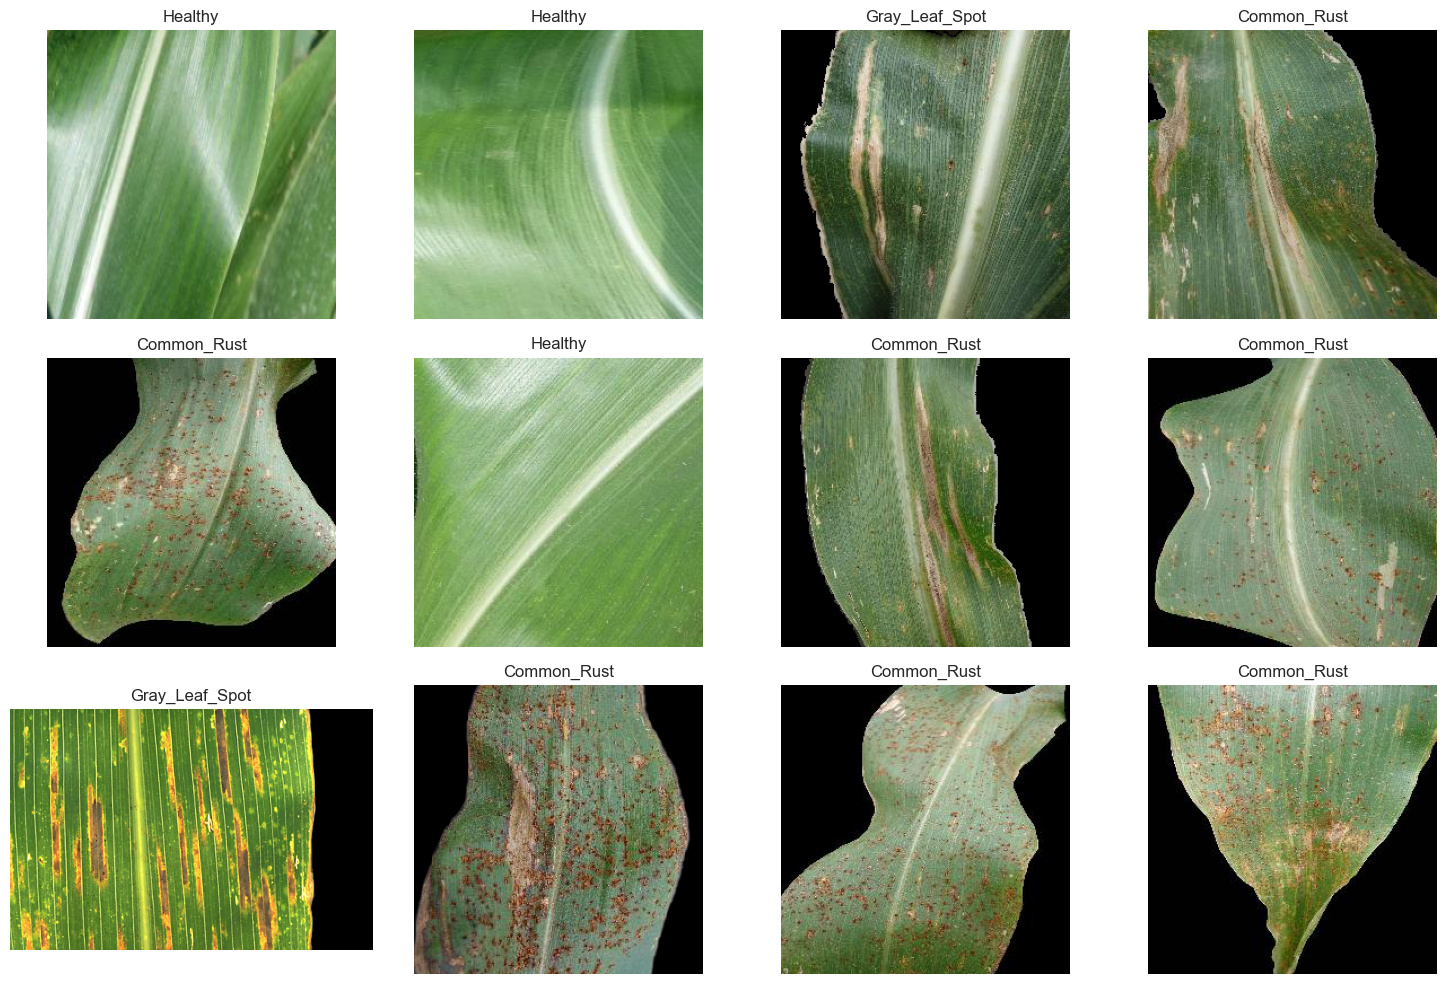

In [33]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Iterate over the axes and randomly select 12 indices
for i, ax in enumerate(axes.flatten()):
    random_index = np.random.randint(0, held_out.shape[0])
    image_path = held_out.loc[random_index, "Image"]
    predicted_label = y_prediction[random_index]

    # Plot the image on the current subplot
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(predicted_label)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [34]:
model.save('vgg16_model.h5')

In [36]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the fine-tuned model
model1 = Model(inputs=base_model.input, outputs=predictions)

In [38]:
from tensorflow.keras.models import load_model
model1 = load_model('vgg16_model.h5')

In [39]:
prediction=model1.predict(held_images)

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


In [40]:
prediction=np.argmax(prediction, axis=1)
prediction.shape

(293,)

In [41]:
labels = train_images.class_indices
labels = {v: k for k, v in labels.items()}

In [42]:
y_prediction = [labels.get(k) for k in prediction]
y_test = held_out["Quality"].values

In [43]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_prediction))

                precision    recall  f1-score   support

        Blight       0.87      0.45      0.60        75
   Common_Rust       0.77      0.95      0.85        97
Gray_Leaf_Spot       0.60      0.84      0.70        37
       Healthy       1.00      0.99      0.99        84

      accuracy                           0.82       293
     macro avg       0.81      0.81      0.78       293
  weighted avg       0.84      0.82      0.81       293



In [44]:
accuracy_score(y_prediction, y_test)

0.8191126279863481

In [45]:

from sklearn.metrics import confusion_matrix

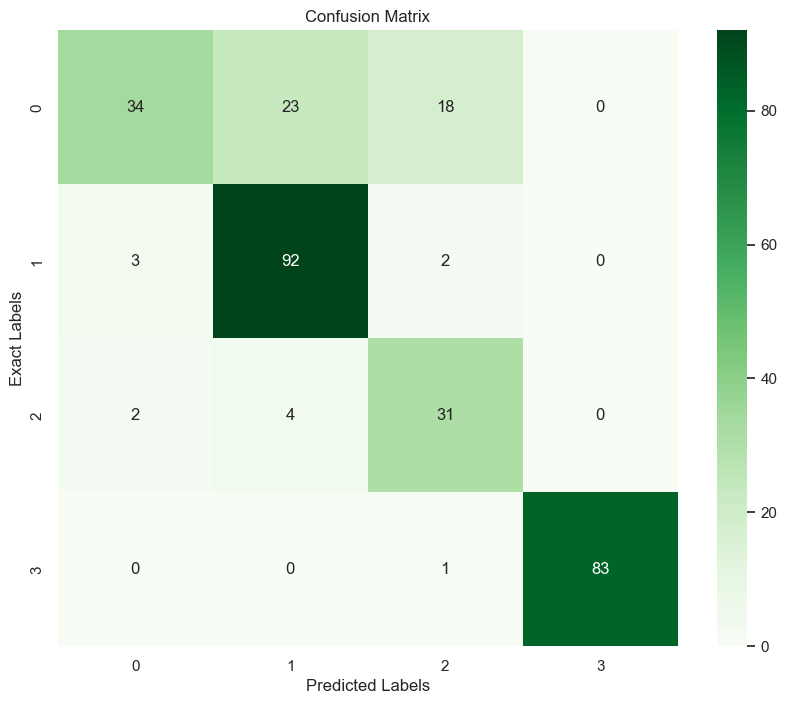

In [46]:
cm = confusion_matrix(y_test, y_prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.show()

In [47]:
held_out.reset_index(drop=True, inplace=True)
held_out.head()

Image         Quality
0  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...     Common_Rust
1  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Gray_Leaf_Spot
2  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...  Gray_Leaf_Spot
3  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...         Healthy
4  E:/MITAOE/BTech/DeepLearning/Encoder Decoder/s...         Healthy

In [48]:
random_index = np.random.randint(0, held_out.shape[0])
image_path = held_out.loc[random_index, "Image"]
predicted_label = y_prediction[random_index]

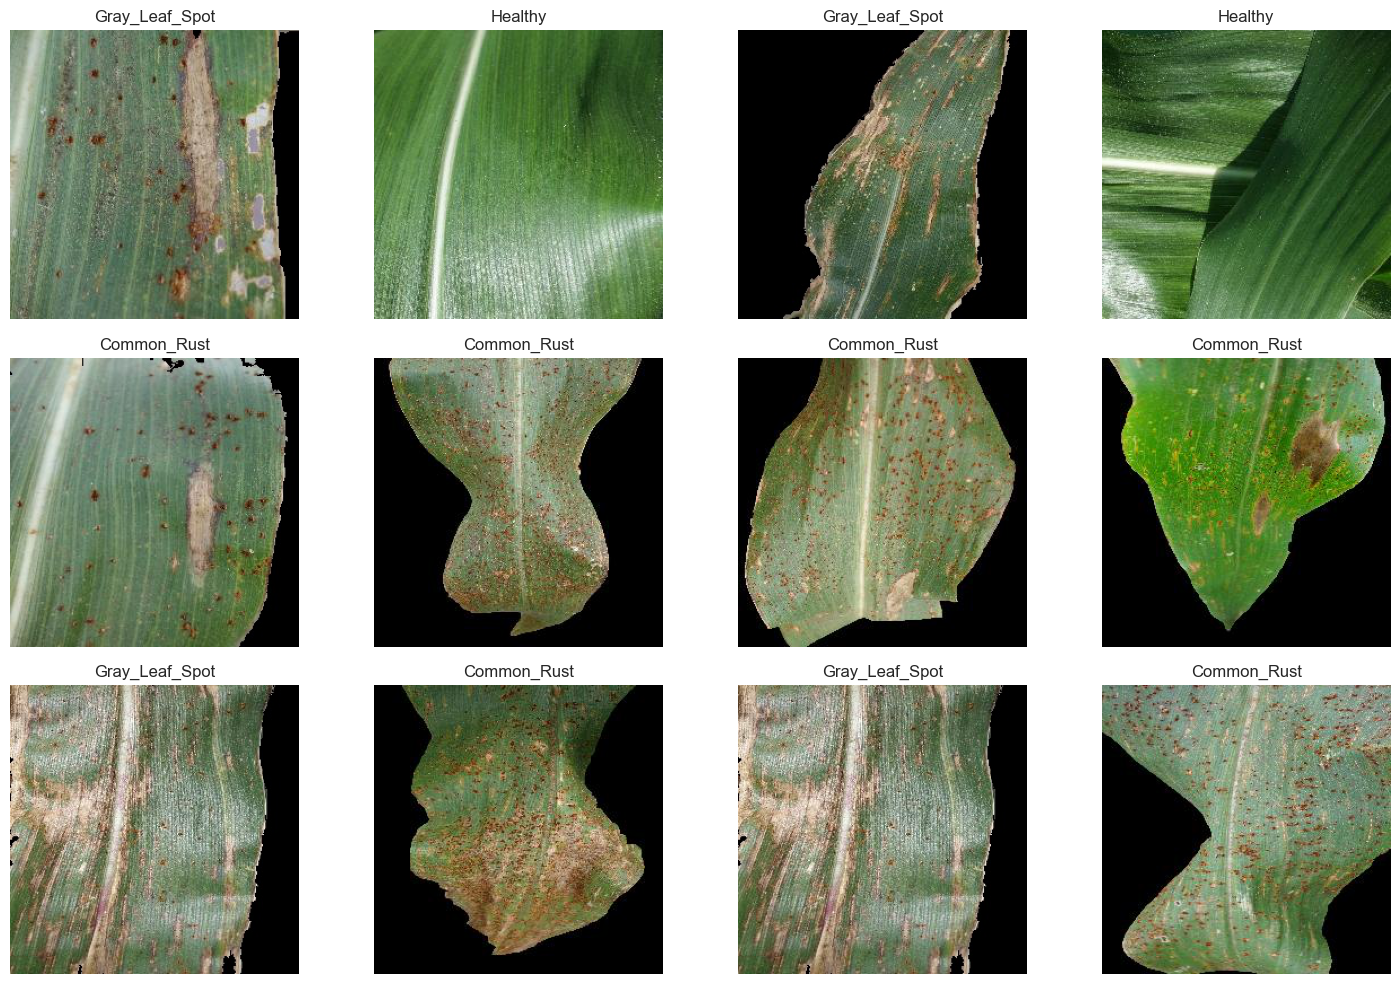

In [49]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Iterate over the axes and randomly select 12 indices
for i, ax in enumerate(axes.flatten()):
    random_index = np.random.randint(0, held_out.shape[0])
    image_path = held_out.loc[random_index, "Image"]
    predicted_label = y_prediction[random_index]

    # Plot the image on the current subplot
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(predicted_label)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()